In [1]:
!pip install tensorflow

In [2]:
!pip install pillow matplotlib

Found 160 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
{'tumor-negative': 0, 'tumor-positive': 1}


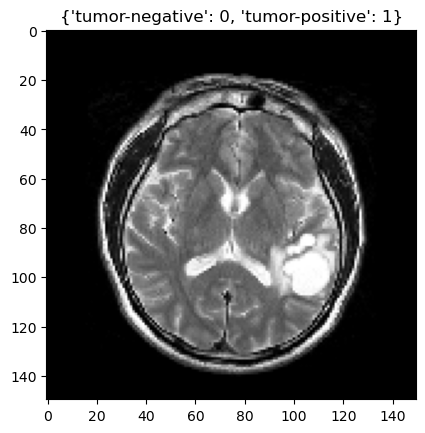

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 643ms/step - accuracy: 0.5793 - loss: 0.8269 - val_accuracy: 0.8553 - val_loss: 0.5046
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 0.7230 - loss: 0.5664 - val_accuracy: 0.8816 - val_loss: 0.4450
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 0.7971 - loss: 0.5200 - val_accuracy: 0.7368 - val_loss: 0.5298
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 0.7064 - loss: 0.5539 - val_accuracy: 0.8947 - val_loss: 0.4463
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.7655 - loss: 0.5165 - val_accuracy: 0.8947 - val_loss: 0.4151
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.7735 - loss: 0.4699 - val_accuracy: 0.8026 - val_loss: 0.4059
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - accuracy: 0.8474 - loss: 0.3595 - val_accuracy: 0.9211 - val_loss: 0.3821
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - accuracy: 0.8045 - loss: 0.3889 - val_accuracy: 0.7763 - val_loss:

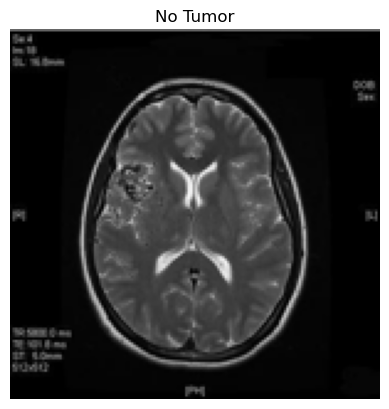

Final Training Accuracy: 0.9875
Final Validation Accuracy: 0.8553


In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras import layers, models
import random
import numpy as np

brain_tumor_dataset=r'C:\Users\petro\Desktop\brain_tumor_dataset'

train=os.path.join(brain_tumor_dataset,"train")
test=os.path.join(brain_tumor_dataset,"test")
predict=os.path.join(brain_tumor_dataset,"predict")

train_datagen=idg(rescale=1./255)
test_datagen=idg(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train,target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test,target_size=(150, 150),batch_size=32,class_mode='binary')

print(train_generator.class_indices)

sample_image,sample_label=next(train_generator)
plt.imshow(sample_image[0])
plt.title(train_generator.class_indices)
plt.show()

montelo=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

montelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
montelo.fit(train_generator,validation_data=test_generator,epochs=10)

predict_images=os.listdir(predict)
random_image_name=random.choice(predict_images)
random_image_path=os.path.join(predict,random_image_name)

eikona=Image.open(random_image_path).convert('RGB')
eikona=eikona.resize((150,150))
dianysma_eikonas=np.array(eikona)/255.0
dianysma_eikonas=np.expand_dims(dianysma_eikonas,axis=0)

prediction=montelo.predict(dianysma_eikonas)
prediction_label='Tumor' if prediction[0][0]>0.5 else 'No Tumor'

plt.imshow(eikona)
plt.title(prediction_label)
plt.axis('off')
plt.show()

Accuracy: 0.75
                precision    recall  f1-score   support

tumor-negative       0.73      0.62      0.67        13
tumor-positive       0.76      0.84      0.80        19

      accuracy                           0.75        32
     macro avg       0.74      0.73      0.73        32
  weighted avg       0.75      0.75      0.75        32



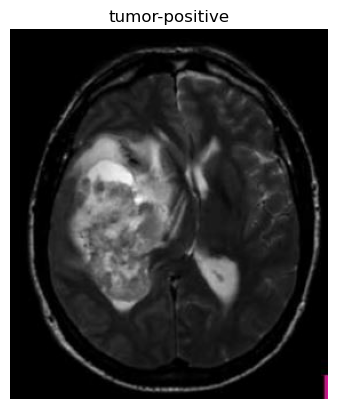

In [15]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import random

dataset_dir=r'C:\Users\petro\Desktop\brain_tumor_dataset'
train_dir=os.path.join(dataset_dir,"train")
predict_dir=os.path.join(dataset_dir,"predict")
image_size=(150, 150)

X=[]
y=[]

classes=os.listdir(train_dir)
label_map={}
for i,c in enumerate(classes):
    label_map[c]=i


for cls in classes:
    cls_folder=os.path.join(train_dir,cls)
    for filename in os.listdir(cls_folder):
        if filename.lower().endswith(('.jpg','.png','.jpeg')):
            path=os.path.join(cls_folder,filename)
            img=Image.open(path).convert('L') 
            img=img.resize(image_size)
            img_array=np.array(img).flatten() 
            X.append(img_array)
            y.append(label_map[cls])

X=np.array(X)/255.0
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

svm_model=SVC(kernel='linear',probability=True)
svm_model.fit(X_train,y_train)

y_pred=svm_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=classes))

predict_images=[]
for f in os.listdir(predict_dir):
    if f.lower().endswith(('.jpg', '.png', '.jpeg')):
        predict_images.append(file)
        
random_image=random.choice(predict_images)
img_path=os.path.join(predict_dir,random_image)

img=Image.open(img_path).convert('L')
img=img.resize(image_size)
img_array=np.array(img).flatten()/255.0
img_array=img_array.reshape(1,-1)

prediction=svm_model.predict(img_array)[0]
prediction_label=classes[prediction]

img_display=Image.open(img_path).convert('RGB')
plt.imshow(img_display)
plt.title(prediction_label)
plt.axis('off')
plt.show()

Found 160 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
{'tumor-negative': 0, 'tumor-positive': 1}


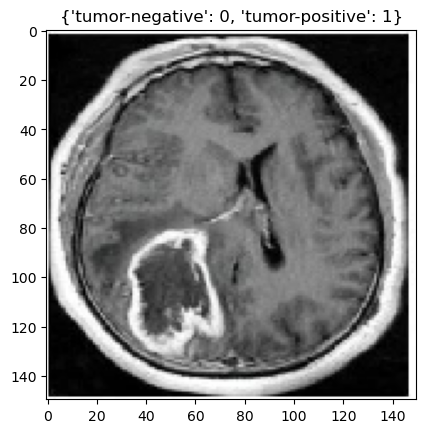

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.5352 - loss: 0.6687 - val_accuracy: 0.8816 - val_loss: 0.4412
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.6690 - loss: 0.6042 - val_accuracy: 0.8816 - val_loss: 0.4376
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.7418 - loss: 0.5270 - val_accuracy: 0.8816 - val_loss: 0.4340
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.7132 - loss: 0.5023 - val_accuracy: 0.8947 - val_loss: 0.4013
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.8385 - loss: 0.4208 - val_accuracy: 0.8816 - val_loss: 0.3870
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.8185 - loss: 0.4759 - val_accuracy: 0.7895 - val_loss: 0.4352
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.8654 - loss: 0.3997 - val_accuracy: 0.8158 - val_loss: 0.3979
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.8572 - loss: 0.3500 - val_accuracy: 0.8158 - val_loss:

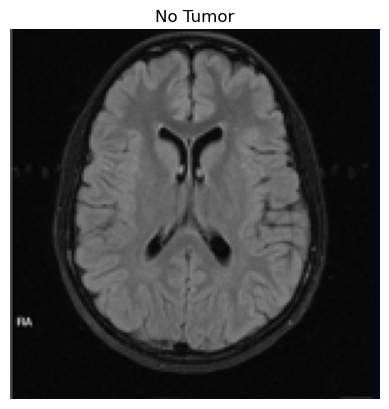

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras import layers, models
import random
import numpy as np

brain_tumor_dataset=r'C:\Users\petro\Desktop\brain_tumor_dataset'

train=os.path.join(brain_tumor_dataset,"train")
test=os.path.join(brain_tumor_dataset,"test")
predict=os.path.join(brain_tumor_dataset,"predict")

train_datagen=idg(rescale=1./255)
test_datagen=idg(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train,target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test,target_size=(150, 150),batch_size=32,class_mode='binary')

print(train_generator.class_indices)

sample_image,sample_label=next(train_generator)
plt.imshow(sample_image[0])
plt.title(train_generator.class_indices)
plt.show()

montelo=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

montelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
montelo.fit(train_generator,validation_data=test_generator,epochs=10)

predict_images=os.listdir(predict)
random_image_name=random.choice(predict_images)
random_image_path=os.path.join(predict,random_image_name)

eikona=Image.open(random_image_path).convert('RGB')
eikona=eikona.resize((150,150))
dianysma_eikonas=np.array(eikona)/255.0
dianysma_eikonas=np.expand_dims(dianysma_eikonas,axis=0)

prediction=montelo.predict(dianysma_eikonas)
prediction_label='Tumor' if prediction[0][0]>0.5 else 'No Tumor'

plt.imshow(eikona)
plt.title(prediction_label)
plt.axis('off')
plt.show()

Found 160 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
{'tumor-negative': 0, 'tumor-positive': 1}


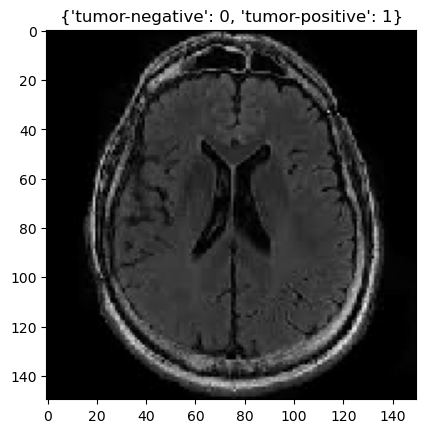

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5944 - loss: 0.7091 - val_accuracy: 0.8816 - val_loss: 0.5406
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 980ms/step - accuracy: 0.7322 - loss: 0.5542 - val_accuracy: 0.8816 - val_loss: 0.3765
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 876ms/step - accuracy: 0.7145 - loss: 0.6214 - val_accuracy: 0.7895 - val_loss: 0.4792
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step - accuracy: 0.7572 - loss: 0.4943 - val_accuracy: 0.9079 - val_loss: 0.3849
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 887ms/step - accuracy: 0.8187 - loss: 0.4411 - val_accuracy: 0.7500 - val_loss: 0.4979
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 996ms/step - accuracy: 0.7931 - loss: 0.4700 - val_accuracy: 0.9342 - val_loss: 0.3940
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 902ms/step - accuracy: 0.8327 - loss: 0.3977 - val_accuracy: 0.8553 - val_loss: 0.3814
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 917ms/step - accuracy: 0.8447 - loss: 0.3661 - val_accuracy: 0.7632 - val_loss: 0.

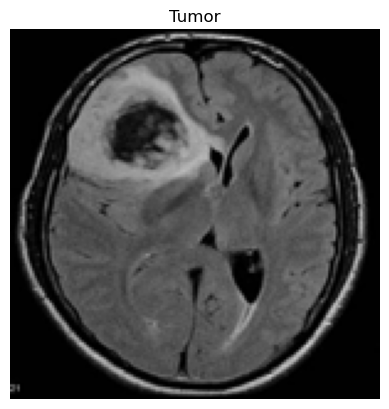

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras import layers, models
import random
import numpy as np

brain_tumor_dataset=r'C:\Users\petro\Desktop\brain_tumor_dataset'

train=os.path.join(brain_tumor_dataset,"train")
test=os.path.join(brain_tumor_dataset,"test")
predict=os.path.join(brain_tumor_dataset,"predict")

train_datagen=idg(rescale=1./255)
test_datagen=idg(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train,target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test,target_size=(150, 150),batch_size=32,class_mode='binary')

print(train_generator.class_indices)

sample_image,sample_label=next(train_generator)
plt.imshow(sample_image[0])
plt.title(train_generator.class_indices)
plt.show()

montelo=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

montelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
montelo.fit(train_generator,validation_data=test_generator,epochs=10)

predict_images=os.listdir(predict)
random_image_name=random.choice(predict_images)
random_image_path=os.path.join(predict,random_image_name)

eikona=Image.open(random_image_path).convert('RGB')
eikona=eikona.resize((150,150))
dianysma_eikonas=np.array(eikona)/255.0
dianysma_eikonas=np.expand_dims(dianysma_eikonas,axis=0)

prediction=montelo.predict(dianysma_eikonas)
prediction_label='Tumor' if prediction[0][0]>0.5 else 'No Tumor'

plt.imshow(eikona)
plt.title(prediction_label)
plt.axis('off')
plt.show()

Found 160 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
{'tumor-negative': 0, 'tumor-positive': 1}


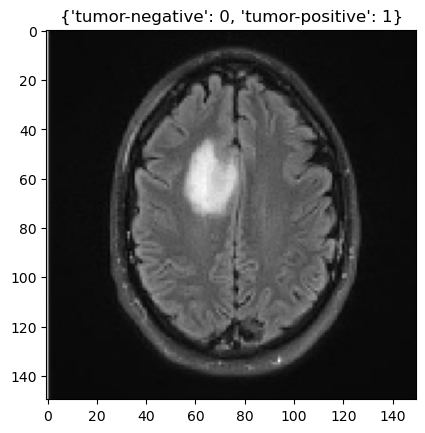

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.5329 - loss: 0.8214 - val_accuracy: 0.8816 - val_loss: 0.6550
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6821 - loss: 0.6378 - val_accuracy: 0.8816 - val_loss: 0.4260
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.6307 - loss: 0.6120 - val_accuracy: 0.8816 - val_loss: 0.4372
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7654 - loss: 0.5387 - val_accuracy: 0.8816 - val_loss: 0.4286
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7314 - loss: 0.5281 - val_accuracy: 0.8553 - val_loss: 0.4415
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8062 - loss: 0.4450 - val_accuracy: 0.8816 - val_loss: 0.3765
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7645 - loss: 0.4816 - val_accuracy: 0.9211 - val_loss: 0.4064
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.8365 - loss: 0.3973 - val_accuracy: 0.7763 - val_loss: 0.4326
Epoch 9/

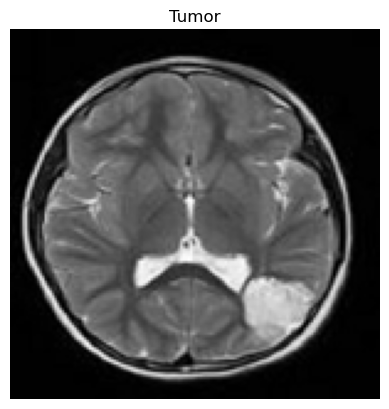

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras import layers, models
import random
import numpy as np

brain_tumor_dataset=r'C:\Users\petro\Desktop\brain_tumor_dataset'

train=os.path.join(brain_tumor_dataset,"train")
test=os.path.join(brain_tumor_dataset,"test")
predict=os.path.join(brain_tumor_dataset,"predict")

train_datagen=idg(rescale=1./255)
test_datagen=idg(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train,target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test,target_size=(150, 150),batch_size=32,class_mode='binary')

print(train_generator.class_indices)

sample_image,sample_label=next(train_generator)
plt.imshow(sample_image[0])
plt.title(train_generator.class_indices)
plt.show()

montelo=models.Sequential([
    layers.Conv2D(128,(3,3),activation='relu',input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

montelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
montelo.fit(train_generator,validation_data=test_generator,epochs=15)

predict_images=os.listdir(predict)
random_image_name=random.choice(predict_images)
random_image_path=os.path.join(predict,random_image_name)

eikona=Image.open(random_image_path).convert('RGB')
eikona=eikona.resize((150,150))
dianysma_eikonas=np.array(eikona)/255.0
dianysma_eikonas=np.expand_dims(dianysma_eikonas,axis=0)

prediction=montelo.predict(dianysma_eikonas)
prediction_label='Tumor' if prediction[0][0]>0.5 else 'No Tumor'

plt.imshow(eikona)
plt.title(prediction_label)
plt.axis('off')
plt.show()

Found 160 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
{'tumor-negative': 0, 'tumor-positive': 1}


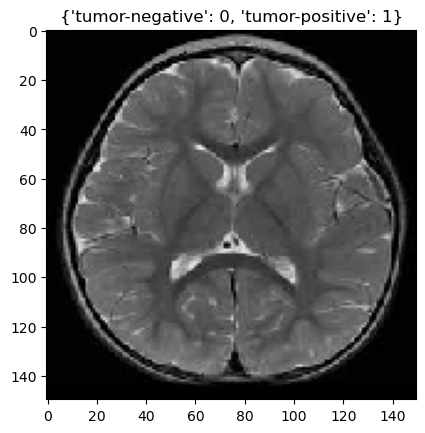

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 14s/step - accuracy: 0.4659 - loss: 1.2623 - val_accuracy: 0.6579 - val_loss: 0.5931
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 12s/step - accuracy: 0.6376 - loss: 0.6429 - val_accuracy: 0.5921 - val_loss: 0.6724
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 12s/step - accuracy: 0.5852 - loss: 0.6657 - val_accuracy: 0.8553 - val_loss: 0.5322
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 62s 13s/step - accuracy: 0.6825 - loss: 0.6005 - val_accuracy: 0.8553 - val_loss: 0.4148
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 14s/step - accuracy: 0.6680 - loss: 0.6277 - val_accuracy: 0.8289 - val_loss: 0.4858
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 70s 15s/step - accuracy: 0.7936 - loss: 0.5127 - val_accuracy: 0.8947 - val_loss: 0.4219
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 67s 14s/step - accuracy: 0.7582 - loss: 0.5360 - val_accuracy: 0.8421 - val_loss: 0.4461
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 15s/step - accuracy: 0.7752 - loss: 0.4858 - val_accuracy: 0.8289 - val_loss: 0.4128


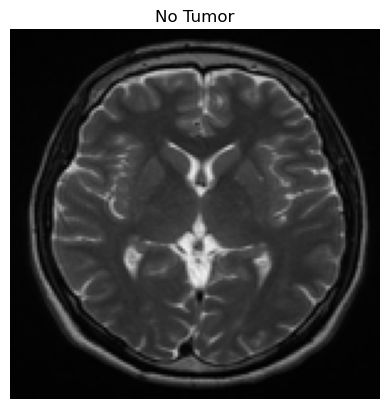

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras import layers, models
import random
import numpy as np

brain_tumor_dataset=r'C:\Users\petro\Desktop\brain_tumor_dataset'

train=os.path.join(brain_tumor_dataset,"train")
test=os.path.join(brain_tumor_dataset,"test")
predict=os.path.join(brain_tumor_dataset,"predict")

train_datagen=idg(rescale=1./255)
test_datagen=idg(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train,target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test,target_size=(150, 150),batch_size=32,class_mode='binary')

print(train_generator.class_indices)

sample_image,sample_label=next(train_generator)
plt.imshow(sample_image[0])
plt.title(train_generator.class_indices)
plt.show()

montelo=models.Sequential([
    layers.Conv2D(256,(3,3),activation='relu',input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')])

montelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
montelo.fit(train_generator,validation_data=test_generator,epochs=10)

predict_images=os.listdir(predict)
random_image_name=random.choice(predict_images)
random_image_path=os.path.join(predict,random_image_name)

eikona=Image.open(random_image_path).convert('RGB')
eikona=eikona.resize((150,150))
dianysma_eikonas=np.array(eikona)/255.0
dianysma_eikonas=np.expand_dims(dianysma_eikonas,axis=0)

prediction=montelo.predict(dianysma_eikonas)
prediction_label='Tumor' if prediction[0][0]>0.5 else 'No Tumor'

plt.imshow(eikona)
plt.title(prediction_label)
plt.axis('off')
plt.show()

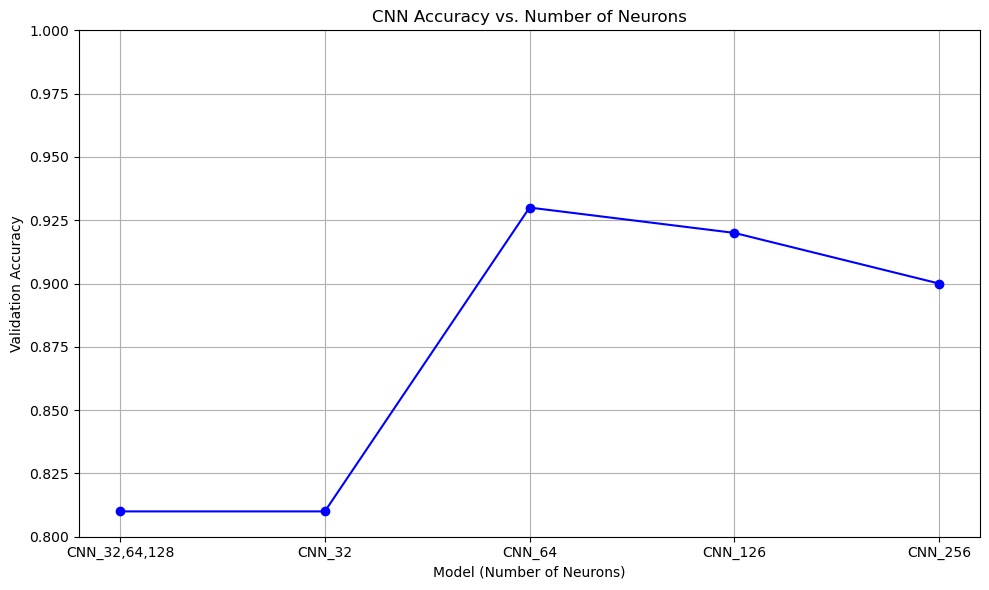

In [31]:
# Ονόματα των μοντέλων ή περιγραφές (π.χ. πόσοι νευρώνες είχε κάθε μοντέλο)
model_names = ['CNN_32,64,128', 'CNN_32', 'CNN_64', 'CNN_126','CNN_256']

accuracies = [0.81, 0.81, 0.93, 0.92, 0.90]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b')

plt.title('CNN Accuracy vs. Number of Neurons')
plt.xlabel('Model (Number of Neurons)')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1.0)  
plt.grid(True)
plt.tight_layout()
plt.show()

